# Live Coding Assignment: Module 2

The Roper Center for Public Opinion Research Links to an external site.describes itself as "the World’s Largest Public Opinion Archive", and is an online archive of the datasets used to generate public opinion polling results dating back to 1935. It's not simply a collection of aggregate measures (such as the overall presidential approval rate over time), but it provides access to the individual responses that comprise each poll: if a poll interviewed 1000 people, we get the spreadsheet with 1000 rows. It allows us to correlate, visualize, and regress the responses to each poll question in any way we'd like.

In [1]:
# load the three datasets
import pandas as pd
import numpy as np # probably not needed
from matplotlib import pyplot as plt

In [24]:
import os
print(os.getcwd())

# print all the files in the current working directory
print(os.listdir())

c:\Users\dianam\Documents\jlab_datascience\PlayGround\UVa\ds6001\mod2\livecoding
['31119104.csv', '31119104.DTA', 'i20068.dat', 'livecodingmod2.ipynb', 'USAIPO1936-0053.csv']


### Gallup Poll # 1936-0053: Teachers' Oath/Government Loans for Farmers/Employers Insurance Contributions/Presidential Candidates [Roper #31087039]

In [27]:
pd.set_option('display.max_columns',80) 

In [12]:
# Gallup Poll # 1936-0053: Teachers' Oath/Government Loans for Farmers/Employers Insurance Contributions/Presidential Candidates [Roper #31087039]
df_gallup = pd.read_csv('USAIPO1936-0053.csv',quotechar="\"")
print(df_gallup.shape)
df_gallup.head()

(5515, 44)


,form,state,region,female,age,class,OCCUPATION1,OCCUPATION2,OCCUPATION3,black,size,education,AGE_3WAY,AGE40,OCC8,prof,REGION4,EDU_RECODE,VOTE_PRO,VOTE_RETRO,PHONE_RECODE,CAR_RECODE,ballot,Q1,Q2,Q3,Q4A,Q4B,Q4C,Q5A,Q5B,farm,SIZE3,urban,StPOAbrv,SOUTH11,SOUTH11xBLACK,SOUTH12,SOUTH12xBLACK,south,SOUTHxBLACK,year,WtPubFeas,WtVotFeas
0,NaN,Indiana,East Central,Male,NaN,Av+,Skilled workers,NaN,NaN,NaN,Urban,NaN,NaN,NaN,Labor,Not Professional,Midwest,NaN,Landon,Hoover,NaN,NaN,53,Yes,Yes,Yes,Roosevelt,Roosevelt,Landon,Landon,"Yes, voted for Hoover",Non-Farm,Urban,Urban,in,Non-South,NaN,Non-South,NaN,Non-South,NaN,1936,NaN,NaN
1,NaN,Illinois,East Central,Male,NaN,Av+,Skilled workers,NaN,NaN,NaN,Urban,NaN,NaN,NaN,Labor,Not Professional,Midwest,NaN,Landon,Hoover,NaN,NaN,53,Yes,NaN,Yes,Landon,Landon,Landon,Landon,"Yes, voted for Hoover",Non-Farm,Urban,Urban,il,Non-South,NaN,Non-South,NaN,Non-South,NaN,1936,NaN,NaN
2,NaN,Michigan,East Central,Male,NaN,Av,Business,NaN,NaN,NaN,Urban,NaN,NaN,NaN,Professional,Professional,Midwest,NaN,Landon,Hoover,NaN,NaN,53,No,No,Yes,Landon,Landon,Landon,Landon,"Yes, voted for Hoover",Non-Farm,Urban,Urban,mi,Non-South,NaN,Non-South,NaN,Non-South,NaN,1936,NaN,NaN
3,NaN,Virginia,South and Southwest,Male,55 yrs and over,P or P+,Skilled workers,NaN,NaN,NaN,Urban,NaN,NaN,NaN,Labor,Not Professional,South,NaN,fdr,fdr,NaN,NaN,53,Yes,Yes,Yes,Roosevelt,Roosevelt,Roosevelt,Roosevelt,"Yes, voted for Roosevelt",Non-Farm,Urban,Urban,va,South,NaN,South,NaN,South,NaN,1936,NaN,NaN
4,NaN,Florida,South and Southwest,Male,55 yrs and over,Av+,Skilled workers,NaN,NaN,NaN,Small town,NaN,NaN,NaN,Labor,Not Professional,South,NaN,fdr,fdr,NaN,NaN,53,Yes,Yes,Yes,Roosevelt,Roosevelt,Roosevelt,Roosevelt,"Yes, voted for Roosevelt",Non-Farm,Rural Non-Farm,Non-Urban,fl,South,NaN,South,NaN,South,NaN,1936,NaN,NaN


In [16]:
# show a cross tab of Q3 and 
pd.crosstab(df_gallup['Q3'],df_gallup['Q5A'])

Q5A,Landon,Lemke,Other party,Roosevelt,Thomas
Q3,,,,,
No,921,41,6,442,10
Yes,820,109,6,2048,41


People who do not support social security, supported Landon.

People who do support social security, support FDR (Roosevelt).

<AxesSubplot: >

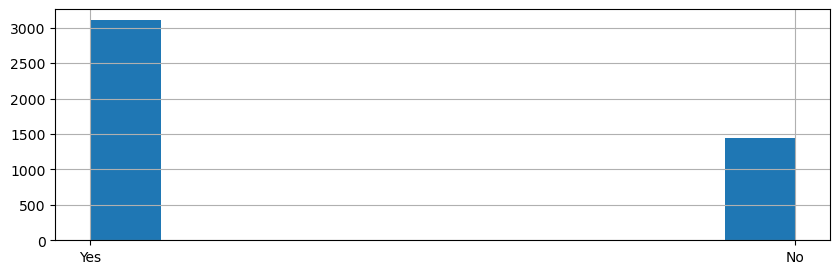

In [15]:
# Q3 is whether they support Social Security / "Old Age Insurance"
# show a histogram of the responses
plt.figure(figsize=(10,3))
df_gallup['Q3'].hist()

In [13]:
# show me the value counts for the OCCUPATION1 columns
df_gallup.OCCUPATION1.value_counts()

Skilled workers      3030
Other and None       1252
Unskilled workers     428
Professiol            382
Business              345
Unemployed             76
Name: OCCUPATION1, dtype: int64

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'East Central'),
  Text(1, 0, 'South and Southwest'),
  Text(2, 0, 'West Central'),
  Text(3, 0, 'Middle Atlantic'),
  Text(4, 0, 'Pacific Coast'),
  Text(5, 0, 'Northeast'),
  Text(6, 0, 'Rocky Mountain')])

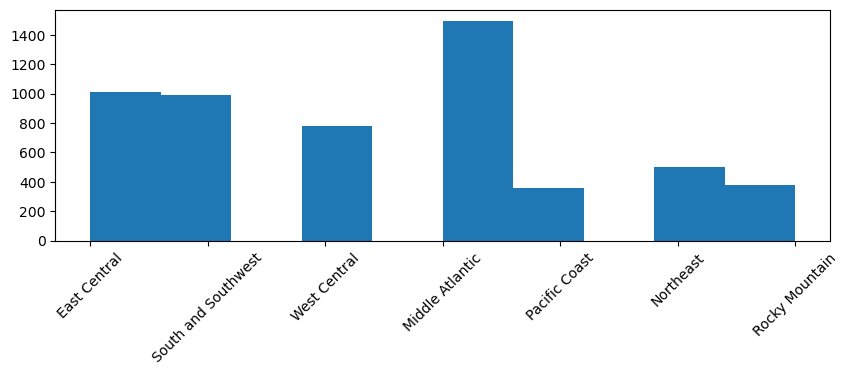

In [8]:
# plot a histogram of histogram of the region

# set the figure size
plt.figure(figsize=(10,3))
plt.hist(df_gallup['region'])
# print the x axis labels 45 degrees
plt.xticks(rotation=45)

### Kaiser Family Foundation: December 2021 COVID-19 Vaccine Monitor: Early Omicron Update [Roper #31119104]

In [29]:
# Kaiser Family Foundation: December 2021 COVID-19 Vaccine Monitor: Early Omicron Update [Roper #31119104]
#df_covid = pd.read_csv('31119104.csv')
# read the dta file
df_covid = pd.read_stata('31119104.dta')
print(df_covid.shape)
df_covid.head(3)

(1065, 79)


,id,BIDENT1,userdata,language,INT1A,INT3A,D1,age,AGE2,recage,RECAGE2,RECAGE3,RECAGE4,RECAGE5,RECAGE6,hispanic,race,racethn,nativity,RACETHN2,VAXQ1,VAXQ2,VAXQ3,VAXQ4,VAXQ5,VAXQ6,VAXQ7,coverage,agecov,covtype,agecovty,covselfo,covself,COVSEL_1,child,marital,employ,recemplo,selfempl,rgender,genderva,lgbt,party,partylea,PARTY3,PARTY5,ideology,educ,receduc,RECEDUC2,RECEDUC3,income,recincom,RECINC_1,CE14,CE17,TRP2,cell,hhcell,landline,hhadults,int,loi,devicety,deviceca,BSSRS_MA,cstate,cregion,density,complete,weight,RECINC_2,division,changese,CDC2013,CDC2013U,state,usr,USR_NEW
0,00000002,web,SSRS Probability Panel,English,NaN,NaN,NaN,68,NaN,65+,65+,65+,60-69,65+,50+,No,White,"White, non-Hispanic",NaN,"White, non-Hispanic",Somewhat worried,Yes,"Yes, received a booster",NaN,Have recommended this,NaN,NaN,Covered by health insurance,NaN,Medicare,NaN,NaN,NaN,,No,Married,Retired,Retired,NaN,Man,Male,No,Or what/Other,Independent/don't lean to either party,Pure Independents,Independent/Don't lean,Liberal,"Some college, no degree (includes some communi...",Some college,Some college,Less than college,"$40,000 to less than $50,000",$40K-$89.9K,$40K+,Once a month,No,Purple,NaN,NaN,NaN,2,NaN,332,Other smart phone (smart phones that is not io...,Smartphone or equivalent (<7 inch),27082976.0,New York,Northeast,Lowest,20211215,0.3532,Less than $50K,Mid Atlantic,sex = rgender,Non-core,Rural (CDC=4-6),NEW YORK,Rural,Rural
1,00000003,web,SSRS Probability Panel,English,NaN,NaN,NaN,46,NaN,18-64,30-49,45-54,40-59,45-64,18-49,No,Black or African-American,"Black, non-Hispanic",NaN,"Black, non-Hispanic",Not too worried,No,NaN,NaN,Have recommended this,"No, does not make me more likely",Nothing,Covered by health insurance,Insured Less than 65,Medicaid/STATE-SPECIFIC MEDICAID NAME,Medicaid,NaN,NaN,,Yes,Married,On disability and can't work,On disability and can't work,NaN,Woman,Female,No,Democrat,NaN,Democrat/Indep lean Dem,Democrat,Conservative,Two-year associate degree from a college or un...,Some college,Some college,Less than college,"$20,000 to less than $30,000",Less than $40K,Less than $40K,"Basically, every day",No,Purple,NaN,NaN,NaN,4,NaN,371,Android smart phones,Smartphone or equivalent (<7 inch),NaN,Michigan,North Central,Highest,20211216,0.4518,Less than $50K,East North Central,sex = rgender,Large central metro,Urban (CDC=1),michigan,Urban,Urban
2,00000004,web,SSRS Probability Panel,English,NaN,NaN,NaN,66,NaN,65+,65+,65+,60-69,65+,50+,No,White,"White, non-Hispanic",NaN,"White, non-Hispanic",Not too worried,Yes,"Yes, received a booster",NaN,Have recommended this,NaN,NaN,Covered by health insurance,NaN,Medicare,NaN,NaN,NaN,,No,Widowed,Retired,Retired,NaN,Woman,Female,No,Republican,NaN,Republican/Indep lean Rep,Republican,Conservative,"Some college, no degree (includes some communi...",Some college,Some college,Less than college,"$40,000 to less than $50,000",$40K-$89.9K,$40K+,A few times a week,No,Purple,NaN,NaN,NaN,2,NaN,234,PC/laptop/Large screen device (e.g. TV etc),PC or equivalent,26420192.0,Virginia,South,4.0,20211217,0.3453,Less than $50K,South Atlantic,sex = rgender,Large fringe metro,"Suburban (CDC=2,3)",virginia,Suburban,Suburban


In [31]:
df_covid.VAXQ1.value_counts()

Not too worried       387
Somewhat worried      379
Not at all worried    168
Very worried          129
WEB BLANK               2
Name: VAXQ1, dtype: int64

(array([379.,   0., 387.,   0.,   0., 168.,   0., 129.,   0.,   2.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

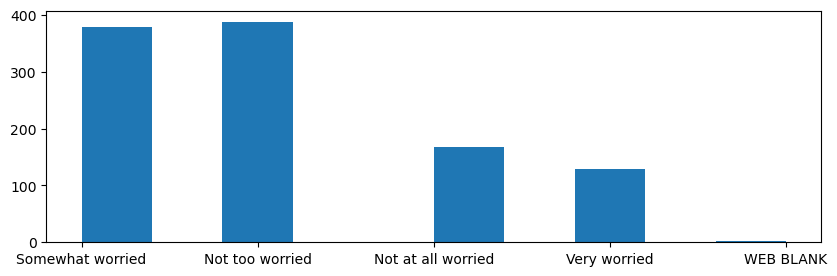

In [36]:
# plot histogram of VAXQ1
plt.figure(figsize=(10,3))
# plot histogram of VAXQ1 color group by party
plt.hist(df_covid['VAXQ1'])


### USIA Poll # 2000-I20068: Economic Conditions/Government Approval/Security/Civilian Rule/International Relations/US [Roper #31086002]

In [37]:
field_ids = range(1,37)

In [41]:
# USIA Poll # 2000-I20068: Economic Conditions/Government Approval/Security/Civilian Rule/International Relations/US [Roper #31086002]
# we need our data dictionary format
# these are NOT the real widths
df_usiapoll= pd.read_fwf("i20068.dat", widths = [1,1,1,4,5,200])
df_usiapoll.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1155,21210,81214231313122423213123344234 2 3 6 13 85333433543332 1533444325531331442331353433 1 6 164 1 313314 2 2 353 15 62 4 4 64
0,NaN,NaN,NaN,2155,21212,0 913111111111412223233332233 2 3 23 ...
1,NaN,NaN,NaN,3155,21210,214 221211112313223212144234 2 8 33 ...
2,NaN,NaN,NaN,4155,21212,9 913231221122332113222233233 2 6 13 ...
3,NaN,NaN,NaN,5155,211,113 9221331112242213111232233 2 6 8 34 ...
4,NaN,NaN,NaN,6155,21212,012 9221122222222314223233133 2 3 33 ...


In [42]:
df = pd.read_csv('https://opendata.arcgis.com/datasets/edaeb963c9464edeb14fea9c7f0135e3_11.csv')

In [43]:
df.head()

,X,Y,OBJECTID,TYPE,Address,PRECINCT,FACILITY_N
0,-78.476009,38.029612,1,Recreation Center,800 E Market Street,Key Recreation,Herman Key Recreation Center
1,-78.486737,38.032733,2,Recreation Center,233 4th Street NW,Carver,Carver Recreation Center
2,-78.490890,38.026067,3,Recreation Center,500 Cherry Avenue,Tonsler,Tonsler Park Recreation Center
3,-78.496202,38.038616,4,City School,406 14th Street NW,Venable,Venable Elementary
4,-78.507986,38.038139,5,UVA Alumni,211 Emmet Street S,Alumni Hall,University of Virginia Alumni Hall


In [45]:
df.dtypes[include='metadata']

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (797589517.py, line 1)